<a href="https://colab.research.google.com/github/lililibin2022/TransferLearning/blob/main/YOLOv8-classify-fermenter0120.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## How to Train YOLOv8 Object Detection on a Custom Dataset

In [1]:
!nvidia-smi

Sat Jan 20 13:05:13 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 701.1/701.1 kB 5.1 MB/s eta 0:00:00


## Install YOLOv8

In [3]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 508, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are ('train', 'val', 'predict', 'export', 'track', 'benchmark').

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ('detect', 'segment', 'classify', 'pose', 'obb')
                MODE (required) is one of ('train', 'val', 'predict', 'export', 'track', 'benchmark')
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at ht

## Train YOLOv8 Model on Custom Dataset

In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="KambJHvvNRVwsQ1xhopi")
project = rf.workspace("fafu").project("fermenter-window-dashboard")
dataset = project.version(1).download("folder")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to fermenter-window-dashboard-1 in folder:: 100%|██████████| 257/257 [00:00<00:00, 4367.15it/s]


In [5]:


# Load a model
model = YOLO('yolov8l-cls.yaml')  # build a new model from YAML
model = YOLO('yolov8l-cls.pt')  # load a pretrained model (recommended for training)
model = YOLO('yolov8l-cls.yaml').load('yolov8m-cls.pt')  # build from YAML and transfer weights

# Train the model
model = YOLO("yolov8l-cls.pt")

model.train(data="/content/fermenter-window-dashboard-1", epochs=300)

YOLOv8l-cls summary: 183 layers, 37480744 parameters, 37480744 gradients, 100.1 GFLOPs


100%|██████████| 71.7M/71.7M [00:00<00:00, 150MB/s]


YOLOv8l-cls summary: 183 layers, 37480744 parameters, 37480744 gradients, 100.1 GFLOPs


100%|██████████| 32.7M/32.7M [00:00<00:00, 238MB/s]


Transferred 44/302 items from pretrained weights
Ultralytics YOLOv8.1.3 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8l-cls.pt, data=/content/fermenter-window-dashboard-1, epochs=300, time=None, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_con

100%|██████████| 6.23M/6.23M [00:00<00:00, 87.1MB/s]


WARNING ⚠️ NMS time limit 0.550s exceeded
AMP: checks passed ✅


train: Scanning /content/fermenter-window-dashboard-1/train... 189 images, 0 corrupt: 100%|██████████| 189/189 [00:00<00:00, 4492.95it/s]

train: New cache created: /content/fermenter-window-dashboard-1/train.cache



val: Scanning /content/fermenter-window-dashboard-1/test... 18 images, 0 corrupt: 100%|██████████| 18/18 [00:00<00:00, 3154.27it/s]

val: New cache created: /content/fermenter-window-dashboard-1/test.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 50 weight(decay=0.0), 51 weight(decay=0.0005), 51 bias(decay=0.0)
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/classify/train
Starting training for 300 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/300      1.67G      1.105         16        224:  58%|█████▊    | 7/12 [00:02<00:00,  5.12it/s]

      1/300      1.67G      1.049         16        224:  92%|█████████▏| 11/12 [00:02<00:00,  4.60it/s]
100%|██████████| 755k/755k [00:00<00:00, 31.0MB/s]
      1/300      1.67G      1.034         13        224: 100%|██████████| 12/12 [00:03<00:00,  3.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00,  5.13it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


      2/300      1.69G     0.5464         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 23.18it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


      3/300      1.65G     0.2185         13        224: 100%|██████████| 12/12 [00:03<00:00,  3.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 17.35it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      4/300      1.66G    0.09949         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 17.56it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


      5/300      1.65G      0.043         13        224: 100%|██████████| 12/12 [00:02<00:00,  5.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 12.51it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


      6/300       1.7G    0.04075         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 20.04it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


      7/300      1.71G    0.01839         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 22.17it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


      8/300       1.7G    0.01194         13        224: 100%|██████████| 12/12 [00:02<00:00,  5.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 19.51it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


      9/300      1.71G   0.009498         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 15.76it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     10/300      1.67G   0.008017         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 23.15it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     11/300      1.68G   0.007149         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 15.33it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     12/300      1.65G    0.04377         13        224: 100%|██████████| 12/12 [00:02<00:00,  5.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 26.93it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     13/300      1.67G    0.02063         13        224: 100%|██████████| 12/12 [00:02<00:00,  4.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 19.30it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     14/300       1.7G    0.01553         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 25.81it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     15/300      1.71G    0.03877         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 26.10it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     16/300      1.67G    0.01738         13        224: 100%|██████████| 12/12 [00:02<00:00,  5.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 15.43it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     17/300       1.7G    0.03206         13        224: 100%|██████████| 12/12 [00:01<00:00,  7.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 22.97it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     18/300      1.69G   0.006623         13        224: 100%|██████████| 12/12 [00:02<00:00,  4.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 20.39it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     19/300      1.67G     0.0177         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 19.43it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     20/300       1.7G   0.008598         13        224: 100%|██████████| 12/12 [00:02<00:00,  4.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 15.00it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     21/300      1.66G   0.009044         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 15.81it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     22/300       1.7G   0.005534         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 15.67it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     23/300      1.68G    0.00374         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 17.28it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     24/300      1.71G   0.004117         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 19.13it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     25/300      1.67G   0.003496         13        224: 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 14.87it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     26/300      1.71G    0.01482         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 17.38it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     27/300      1.67G   0.005318         13        224: 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 22.38it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     28/300       1.7G   0.001845         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 17.89it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     29/300      1.67G   0.003572         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 17.10it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     30/300      1.71G   0.004554         13        224: 100%|██████████| 12/12 [00:03<00:00,  3.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 10.62it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     31/300      1.67G    0.02038         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 20.43it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     32/300       1.7G   0.006416         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 12.85it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     33/300      1.67G    0.01478         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 25.65it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     34/300      1.71G    0.01221         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 14.93it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     35/300      1.66G   0.004071         13        224: 100%|██████████| 12/12 [00:02<00:00,  5.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00,  8.68it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     36/300      1.71G    0.01336         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 16.18it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     37/300      1.67G   0.004372         13        224: 100%|██████████| 12/12 [00:02<00:00,  4.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 17.19it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     38/300      1.71G   0.002853         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 24.13it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     39/300      1.67G   0.002475         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 14.55it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     40/300      1.71G   0.007024         13        224: 100%|██████████| 12/12 [00:02<00:00,  5.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 13.43it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     41/300      1.67G     0.0148         13        224: 100%|██████████| 12/12 [00:02<00:00,  5.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 19.04it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     42/300      1.71G   0.001318         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 28.27it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     43/300      1.67G   0.003515         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 19.44it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     44/300      1.71G   0.002871         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 22.85it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     45/300      1.67G  0.0006347         13        224: 100%|██████████| 12/12 [00:02<00:00,  4.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 17.46it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     46/300      1.71G   0.008543         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 27.78it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     47/300      1.67G   0.004496         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 12.68it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     48/300      1.71G   0.004013         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 25.01it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     49/300      1.67G   0.003026         13        224: 100%|██████████| 12/12 [00:02<00:00,  4.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 19.04it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     50/300      1.71G    0.03155         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 28.63it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     51/300      1.66G    0.05755         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 30.95it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     52/300      1.71G   0.005771         13        224: 100%|██████████| 12/12 [00:02<00:00,  4.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 24.20it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     53/300      1.67G    0.04784         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 20.11it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     54/300      1.71G    0.01578         13        224: 100%|██████████| 12/12 [00:02<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 14.29it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     55/300      1.67G    0.04138         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 15.02it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     56/300      1.71G    0.03113         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 21.58it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     57/300      1.67G    0.01903         13        224: 100%|██████████| 12/12 [00:02<00:00,  4.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 14.91it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     58/300      1.71G    0.00274         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 24.98it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     59/300      1.67G    0.01884         13        224: 100%|██████████| 12/12 [00:03<00:00,  3.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 15.64it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     60/300      1.71G    0.02256         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 14.00it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     61/300      1.67G   0.004415         13        224: 100%|██████████| 12/12 [00:02<00:00,  4.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 14.71it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     62/300      1.71G    0.05897         13        224: 100%|██████████| 12/12 [00:02<00:00,  4.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 12.16it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     63/300      1.67G    0.01311         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 18.77it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     64/300      1.71G    0.01096         13        224: 100%|██████████| 12/12 [00:02<00:00,  4.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 13.97it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     65/300      1.66G   0.007238         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 14.00it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     66/300      1.71G    0.01252         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 37.57it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     67/300      1.67G   0.006701         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 16.77it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     68/300      1.71G   0.006617         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 17.86it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     69/300      1.66G   0.004822         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 29.44it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     70/300      1.71G     0.0107         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 35.70it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     71/300      1.67G  0.0006544         13        224: 100%|██████████| 12/12 [00:02<00:00,  4.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 16.70it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     72/300       1.7G   0.001539         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 14.20it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     73/300      1.67G   0.007462         13        224: 100%|██████████| 12/12 [00:02<00:00,  4.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 10.33it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     74/300      1.71G   0.001456         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 12.94it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     75/300      1.67G     0.0588         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 12.41it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     76/300      1.71G    0.01245         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 14.89it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     77/300      1.67G    0.01885         13        224: 100%|██████████| 12/12 [00:02<00:00,  4.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 15.93it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     78/300       1.7G   0.003485         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 28.41it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


     79/300      1.67G   0.004045         13        224: 100%|██████████| 12/12 [00:02<00:00,  4.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 16.07it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


     80/300       1.7G    0.02722         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 24.35it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     81/300      1.67G    0.01735         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 18.65it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     82/300      1.71G    0.01064         13        224: 100%|██████████| 12/12 [00:02<00:00,  4.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 20.99it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     83/300      1.66G   0.009268         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 15.32it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     84/300      1.71G    0.01512         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 44.22it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     85/300      1.67G    0.02268         13        224: 100%|██████████| 12/12 [00:02<00:00,  5.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 18.26it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     86/300      1.71G    0.00337         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 23.42it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     87/300      1.67G    0.02681         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 15.83it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     88/300      1.71G   0.001844         13        224: 100%|██████████| 12/12 [00:02<00:00,  4.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 15.85it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     89/300      1.67G   0.008705         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 15.07it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     90/300      1.71G   0.003255         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 15.75it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     91/300      1.67G    0.02182         13        224: 100%|██████████| 12/12 [00:02<00:00,  5.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 19.74it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     92/300       1.7G   0.001794         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 10.59it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     93/300      1.67G    0.01283         13        224: 100%|██████████| 12/12 [00:02<00:00,  5.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 19.00it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     94/300      1.71G    0.01529         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 15.34it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     95/300      1.67G   0.001848         13        224: 100%|██████████| 12/12 [00:03<00:00,  3.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 12.39it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     96/300      1.71G   0.003683         13        224: 100%|██████████| 12/12 [00:02<00:00,  4.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 17.70it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     97/300      1.67G   0.002832         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 29.69it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     98/300      1.71G   0.004339         13        224: 100%|██████████| 12/12 [00:02<00:00,  5.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 13.34it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     99/300      1.66G    0.00312         13        224: 100%|██████████| 12/12 [00:01<00:00,  7.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 25.62it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


    100/300      1.67G   0.003797         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 15.98it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


    101/300      1.67G  0.0003281         13        224: 100%|██████████| 12/12 [00:02<00:00,  4.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 32.21it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


    102/300      1.71G  0.0005775         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 23.87it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


    103/300      1.67G   0.001395         13        224: 100%|██████████| 12/12 [00:02<00:00,  4.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 16.52it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


    104/300       1.7G  0.0002513         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 14.38it/s]

                   all      0.944          1
Stopping training early as no improvement observed in last 50 epochs. Best results observed at epoch 54, best model saved as best.pt.
To update EarlyStopping(patience=50) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



104 epochs completed in 0.159 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 72.6MB
Optimizer stripped from runs/classify/train/weights/best.pt, 72.6MB

Validating runs/classify/train/weights/best.pt...
Ultralytics YOLOv8.1.3 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-cls summary (fused): 133 layers, 36188419 parameters, 0 gradients, 98.7 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /content/fermenter-window-dashboard-1/train... found 189 images in 3 classes ✅ 
val: None...
test: /content/fermenter-window-dashboard-1/test... found 18 images in 3 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 14.38it/s]


                   all          1          1
Speed: 0.4ms preprocess, 1.7ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train
Results saved to runs/classify/train


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78992c40fa90>
curves: []
curves_results: []
fitness: 1.0
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 1.0, 'metrics/accuracy_top5': 1.0, 'fitness': 1.0}
save_dir: PosixPath('runs/classify/train')
speed: {'preprocess': 0.3765424092610677, 'inference': 1.7424689398871527, 'loss': 0.000927183363172743, 'postprocess': 0.0007549921671549479}
task: 'classify'
top1: 1.0
top5: 1.0

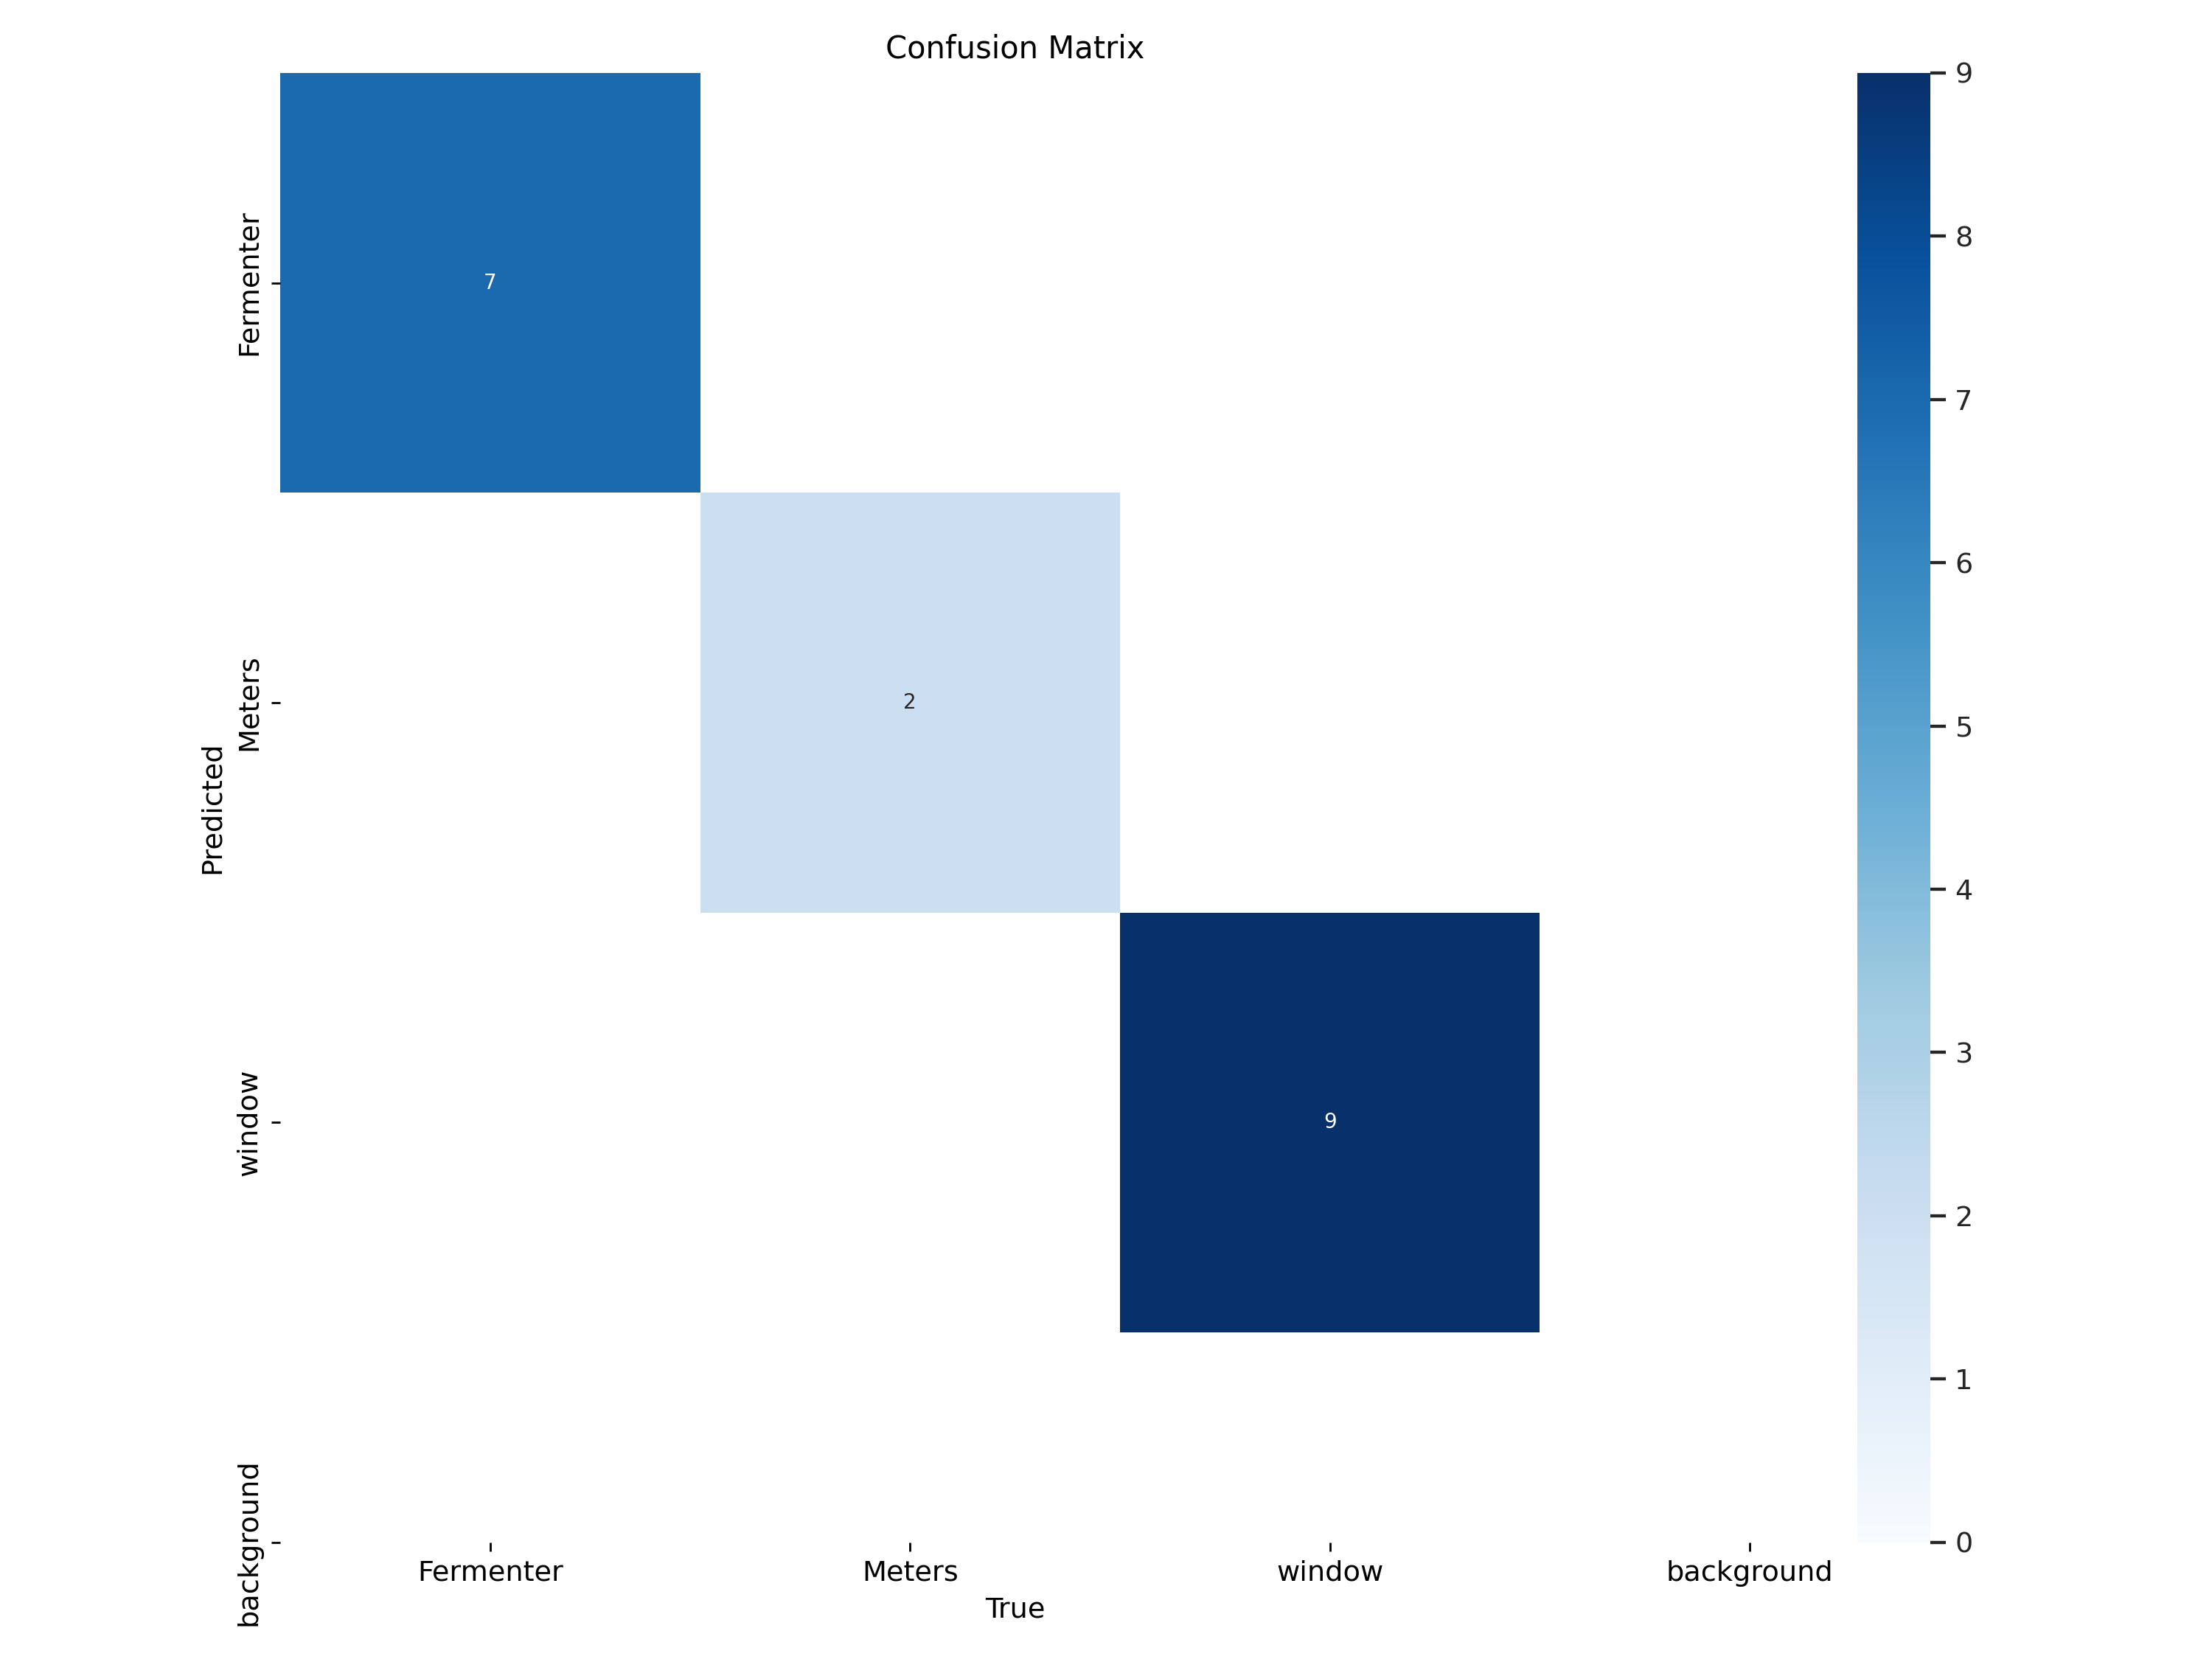

In [6]:
Image(filename=f'/content/runs/classify/train/confusion_matrix.png', width=600)

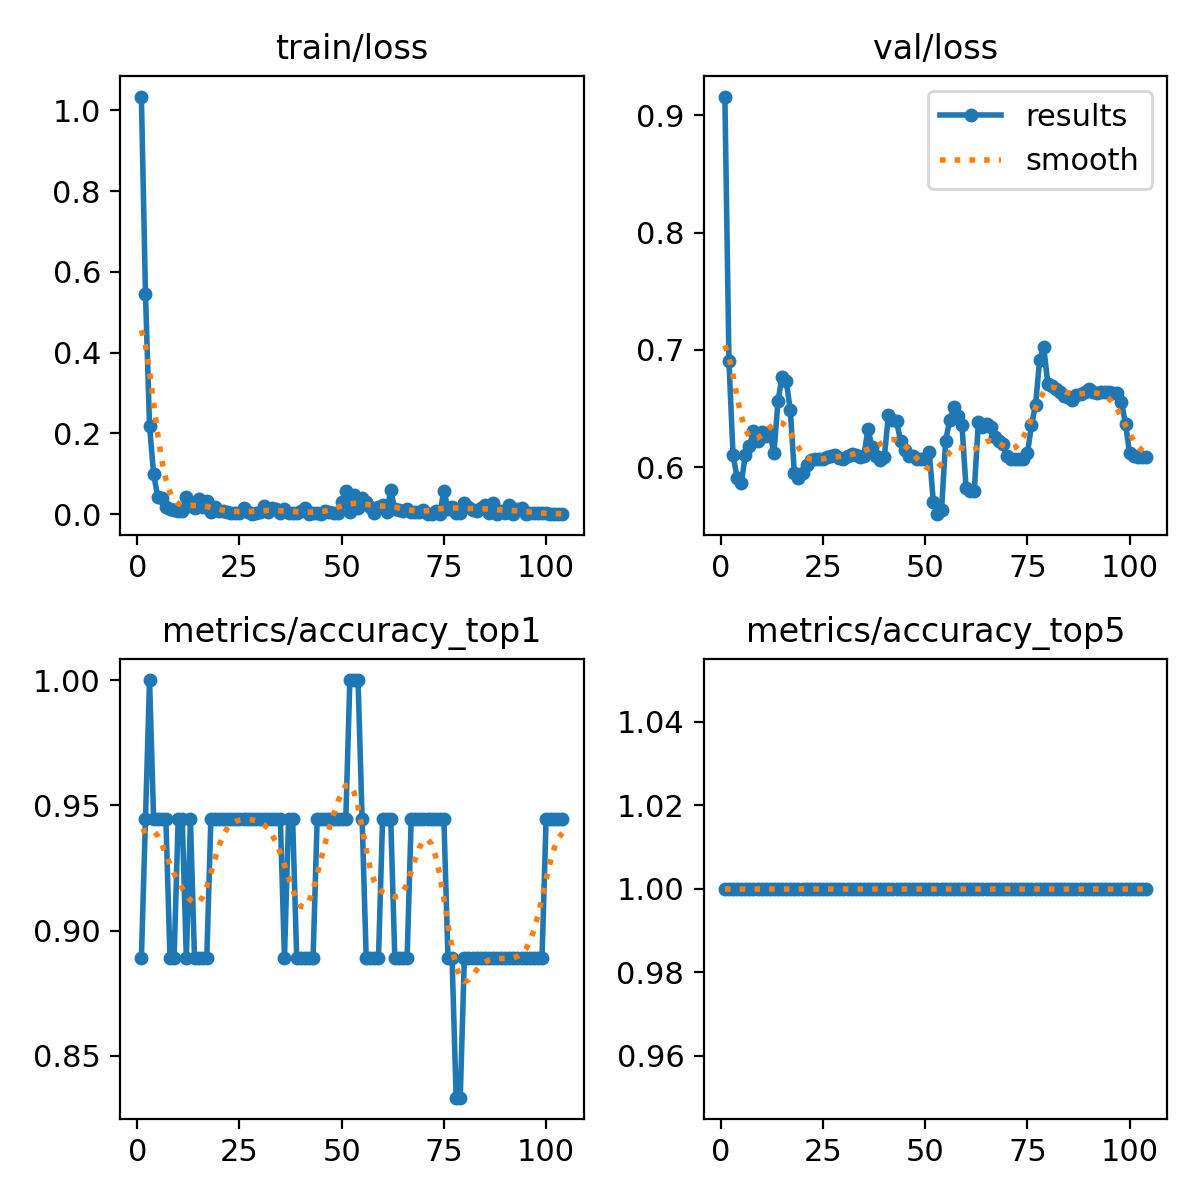

In [7]:
Image(filename=f'/content/runs/classify/train/results.png', width=600)

In [8]:
!yolo task=detect mode=val model=/content/runs/classify/train/weights/best.pt data={dataset.location}

WARNING ⚠️ conflicting 'task=detect' passed with 'task=classify' model. Ignoring 'task=detect' and updating to 'task=classify' to match model.
Ultralytics YOLOv8.1.3 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-cls summary (fused): 133 layers, 36188419 parameters, 0 gradients, 98.7 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /content/fermenter-window-dashboard-1/train... found 189 images in 3 classes ✅ 
val: None...
test: /content/fermenter-window-dashboard-1/test... found 18 images in 3 classes ✅ 
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 567, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 310, in val
    validator(model=self.model)
  File "/usr/local/lib/p

In [9]:
!yolo task=detect mode=predict model=/content/runs/classify/train/weights/best.pt conf=0.5 source={dataset.location}/test/window save_txt=true save_conf=true

WARNING ⚠️ conflicting 'task=detect' passed with 'task=classify' model. Ignoring 'task=detect' and updating to 'task=classify' to match model.
Ultralytics YOLOv8.1.3 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-cls summary (fused): 133 layers, 36188419 parameters, 0 gradients, 98.7 GFLOPs

image 1/9 /content/fermenter-window-dashboard-1/test/window/Day2-FerWin-5-_JPG.rf.4ed8bddfd10edf42e69187f86082b556.jpg: 224x224 window 1.00, Meters 0.00, Fermenter 0.00, 10.9ms
image 2/9 /content/fermenter-window-dashboard-1/test/window/Day3-FerWin-17-_JPG.rf.71a4455fe0773949fb45d7af98228c4b.jpg: 224x224 window 1.00, Meters 0.00, Fermenter 0.00, 10.9ms
image 3/9 /content/fermenter-window-dashboard-1/test/window/Day3-FerWin-2-_JPG.rf.433c5351fd39888cb1b388abdab21036.jpg: 224x224 window 1.00, Meters 0.00, Fermenter 0.00, 10.8ms
image 4/9 /content/fermenter-window-dashboard-1/test/window/Day3-FerWin-6-_JPG.rf.85cf1f381d5f7c85f93e975f7de54c4b.jpg: 224x224 window 1.00, Meters 0.0

In [10]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg'):
      display(Image(filename=image_path, height=600))
      print("\n")

In [14]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [16]:
import shutil
import os

source_directory = '/content/runs/classify'
destination_directory = '/content/gdrive/MyDrive/Fermenterclassify240120/train'  # Use the existing directory as the parent

# Create the destination directory if it doesn't exist
if not os.path.exists(destination_directory):
    os.makedirs(destination_directory)

# Copy the contents of the source directory into the destination directory
for item in os.listdir(source_directory):
    source_item = os.path.join(source_directory, item)
    destination_item = os.path.join(destination_directory, item)
    if os.path.isdir(source_item):
        shutil.copytree(source_item, destination_item)
    else:
        shutil.copy2(source_item, destination_item)